In [ ]:
#Installations
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (966 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fpath = '/content/drive/MyDrive/proyect_iaa/DataSet_Satelite/Yes/Argentina/CBERS_4A_WPM_20210119_224_147_L4_BAND1.tif'

def rasterio_open(f):
    return rio.open(f)

    

src_image = rasterio_open(fpath)
print(src_image.profile)


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 14498, 'height': 14879, 'count': 1, 'crs': CRS.from_epsg(32720), 'transform': Affine(8.0, 0.0, 525178.0,
       0.0, -8.0, 6376094.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


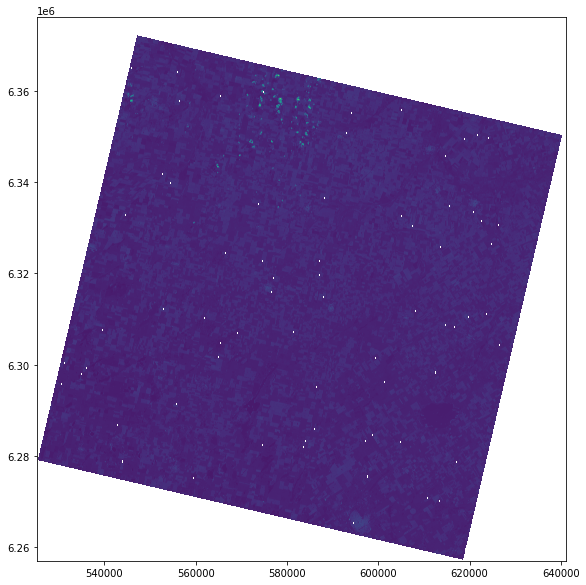

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image, ax=ax)
plt.show()

In [ ]:
src_image_array = src_image.read(1)
src_image_array = src_image_array.astype("f4")
src_image_array

In [ ]:
src_image_array[src_image_array==0] = np.nan

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(src_image_array, ax=ax)
plt.show()

In [ ]:
src_image.profile

#canales imagenes

In [ ]:
window = rio.windows.Window(1200, 1200, 750, 850)

In [ ]:
subset = src_image.read(1, window=window)

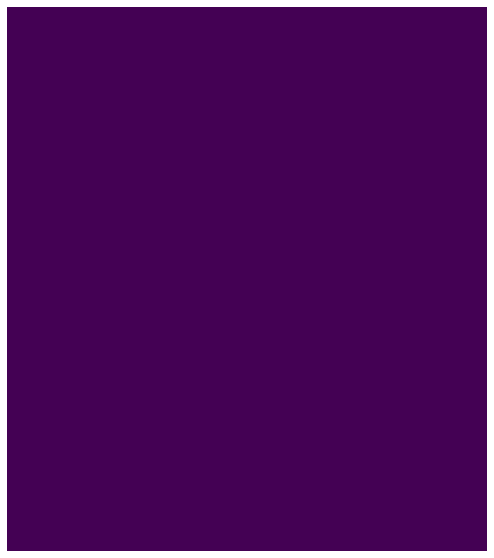

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(subset, ax=ax)
ax.set_axis_off()
plt.show()

# RGB

In [ ]:
rpath = '/content/drive/MyDrive/0 DataSet/Maiz/CBERS_4A_WPM_20210416_219_155_L2_BAND3.tif'
gpath = '/content/drive/MyDrive/0 DataSet/Maiz/CBERS_4A_WPM_20210416_219_155_L2_BAND2.tif'
bpath = '/content/drive/MyDrive/0 DataSet/Maiz/CBERS_4A_WPM_20210416_219_155_L2_BAND1.tif'

In [ ]:
red = rio.open(rpath)
green = rio.open(gpath)
blue = rio.open(bpath)

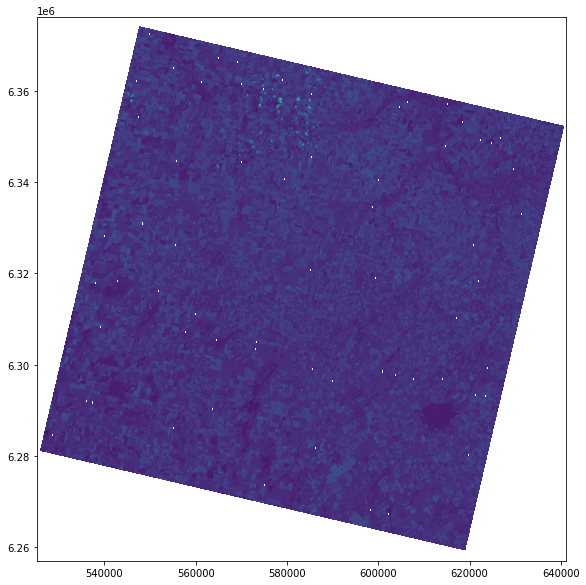

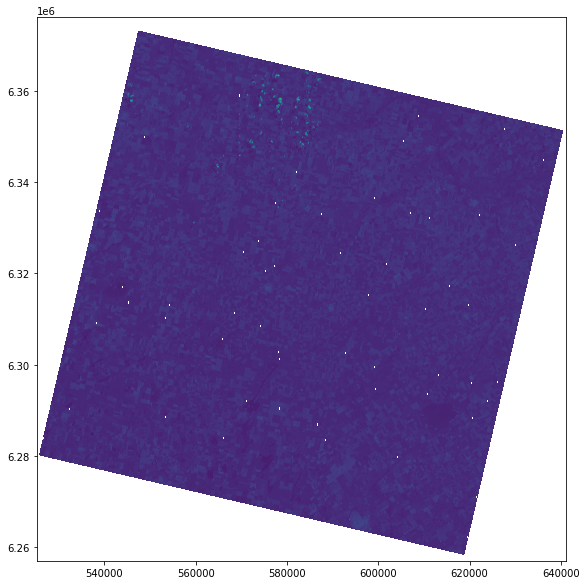

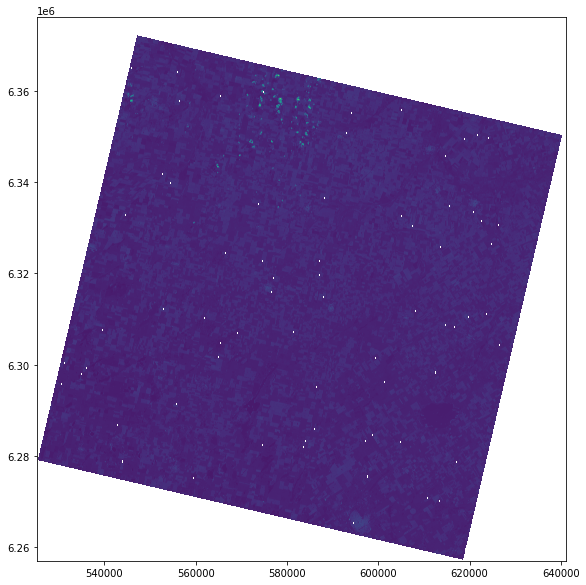

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(red, ax=ax)
plt.show()

fig, ax = plt.subplots(1, figsize=(12, 10))
show(green, ax=ax)
plt.show()

fig, ax = plt.subplots(1, figsize=(12, 10))
show(blue, ax=ax)
plt.show()

In [ ]:
red_array = red.read(1)
green_array = green.read(1)
blue_array = blue.read(1)

In [ ]:
# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=red.width, height=red.height, 
              count=3,crs=red.crs,transform=red.transform, dtype=red.dtypes[0]) as rgb:
    rgb.write(blue.read(1),1) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),3) 
    rgb.close()

In [ ]:
rgb = rio.open("/content/RGB.tiff")

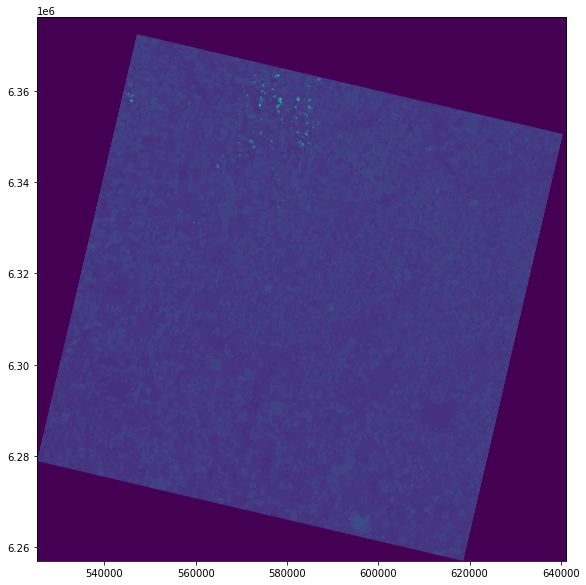

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 10))
show(rgb, ax=ax, cmap="viridis")
plt.show()